In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [2]:
df = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Data Understanding,Visualization & Analysis

**Meaning of each Variable**

* enrollee_id : Unique ID for candidate.
* city: City code.
* city_ development _index : Developement index of the city (scaled).
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* last_new_job: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

**Cheking for Missing Values**

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

* Only city, city development index, relevent experience, training hours and target not have missing values
* Other than that company type has maximum missing values after then company size then gender etc

**Checking for Unique Values**

In [5]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

**Checking for Duplicate Values**

In [6]:
df.duplicated().sum()

0

* It has no duplicate record

**Analyzing Continous Variables**

In [7]:
df['city_development_index'].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

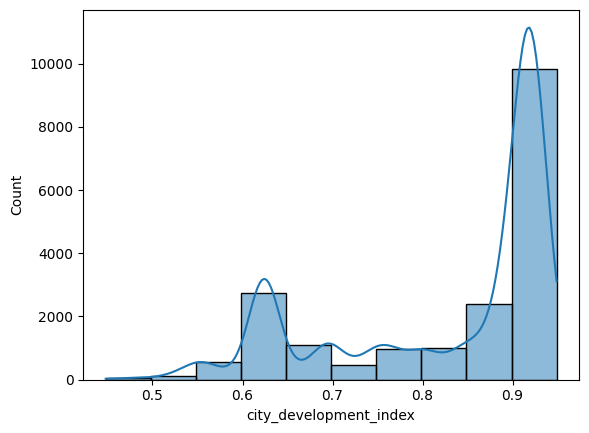

In [8]:
sns.histplot(df['city_development_index'],bins=10,kde=True)
plt.show()

* City development index has minimum value of 0.448000 and maximum value of 0.949000
* Mean of 0.828848 and Standard Deviation 0.123362

**Outliers**

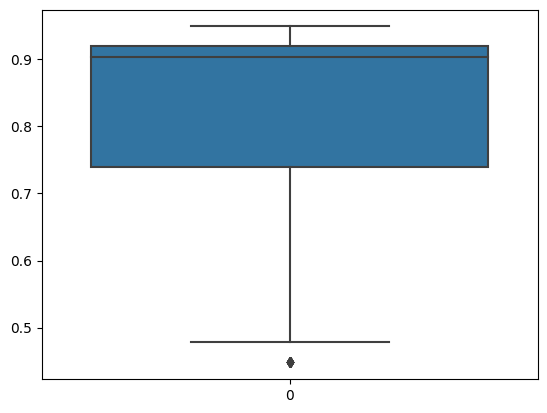

In [9]:
sns.boxplot(df['city_development_index'])
plt.show()

**But we don't treat outliers acc to this type of data**

In [10]:
df['training_hours'].describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

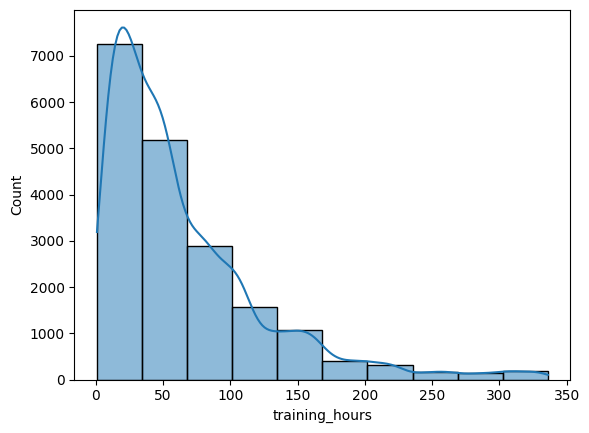

In [11]:
sns.histplot(df['training_hours'],bins=10,kde=True)
plt.show()

* Training Hours index has minimum value of 1 and maximum value of 336
* Mean of 65.366896 and Standard Deviation 60.058462

**Outliers**

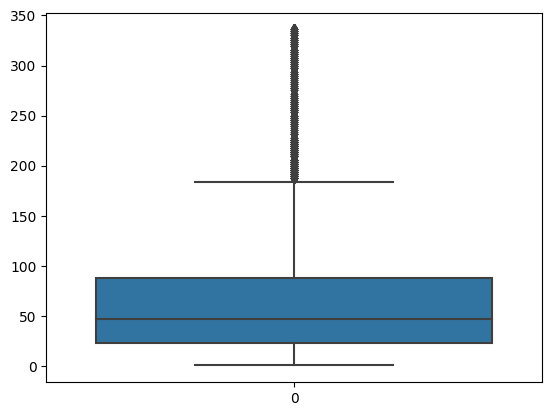

In [12]:
sns.boxplot(df['training_hours'])
plt.show()

**But we don't treat outliers acc to this type of data**

In [13]:
df['target'].describe()

count    19158.000000
mean         0.249348
std          0.432647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

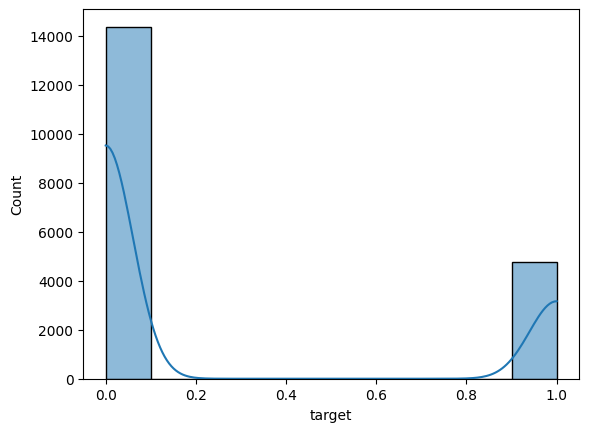

In [14]:
sns.histplot(df['target'],bins=10,kde=True)
plt.show()

* Target has minimum value of 0 and maximum value of 1
* Mean of 0.249348 and Standard Deviation 0.432647

**Outliers**

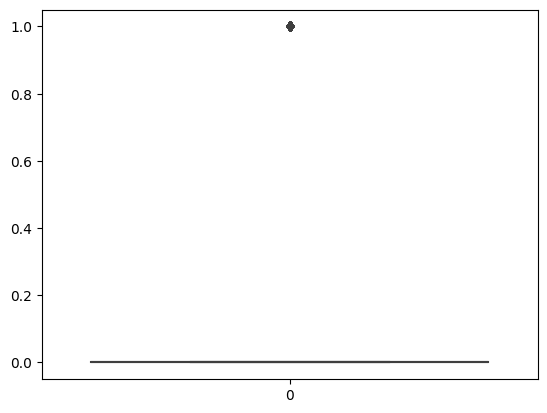

In [15]:
sns.boxplot(df['target'])
plt.show()

**But we don't treat outliers acc to this type of data**

**Analyzing Categorical Variables**

In [16]:
df.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [17]:
df['city'].value_counts()

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

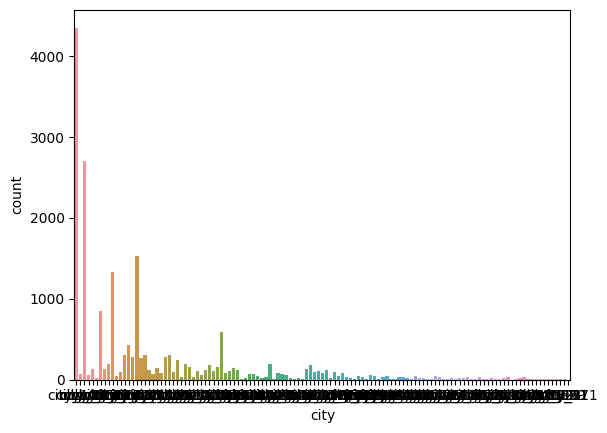

In [18]:
sns.countplot(x='city', data=df)
plt.show()

* City 103 has max occurance of 4355
* City 21 and City 16 has 2nd and 3rd max occurance of 2702 and 1533
* City 140 and City 171 has min occurance of 1

In [19]:
df['gender'].value_counts(dropna=False)

gender
Male      13221
NaN        4508
Female     1238
Other       191
Name: count, dtype: int64

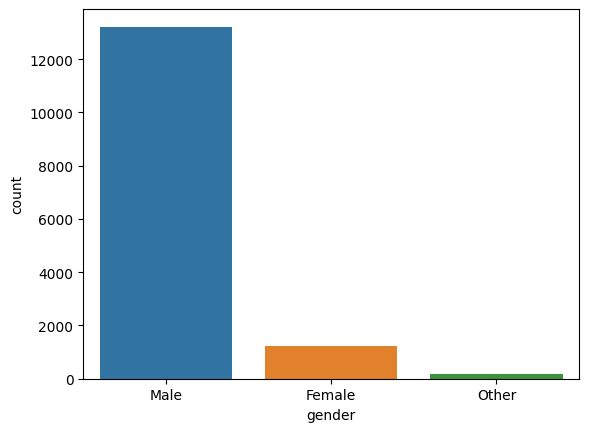

In [20]:
sns.countplot(x='gender',data=df)
plt.show()

* Max employees are Male
* 4508 employees have not specified gender

In [21]:
df['relevent_experience'].value_counts(dropna=False)

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

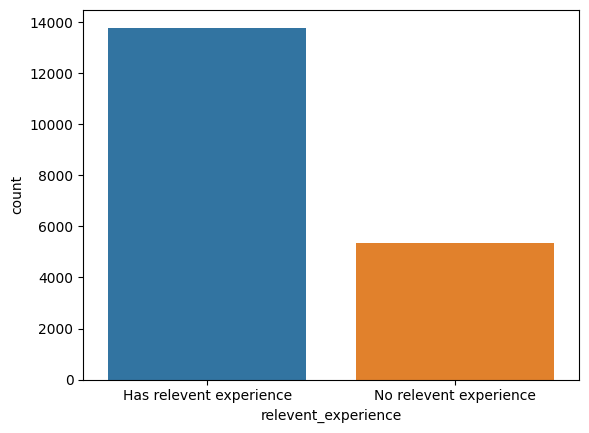

In [22]:
sns.countplot(x='relevent_experience', data=df)
plt.show()

* Max employees has relevent experience

In [23]:
df['enrolled_university'].value_counts(dropna=False)

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: count, dtype: int64

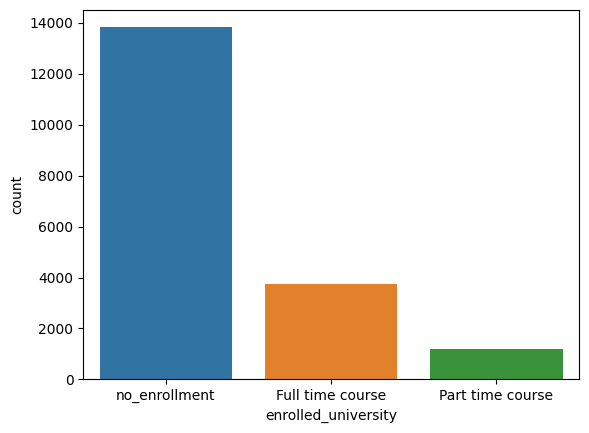

In [24]:
sns.countplot(x='enrolled_university', data=df)
plt.show()

* Max employees have not enrolled in any university
* 386 employees have not specified 

In [25]:
df['education_level'].value_counts(dropna=False)

education_level
Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: count, dtype: int64

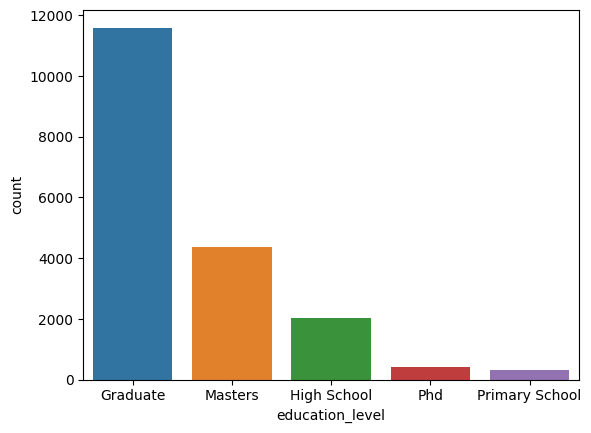

In [26]:
sns.countplot(x='education_level', data=df)
plt.show()

* Max employees have education level of Graduation
* 460 employees have not specified education level

In [27]:
df['major_discipline'].value_counts(dropna=False)

major_discipline
STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

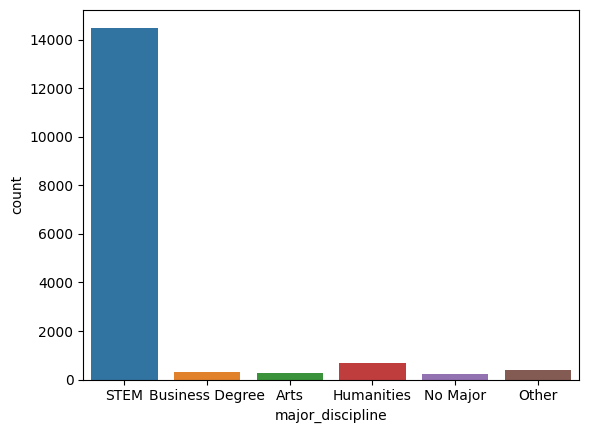

In [28]:
sns.countplot(x='major_discipline', data=df)
plt.show()

* Max employees have major descipline STEM
* 2813 eployees have not specified major discipline

In [29]:
df['experience'].value_counts(dropna=False)

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: count, dtype: int64

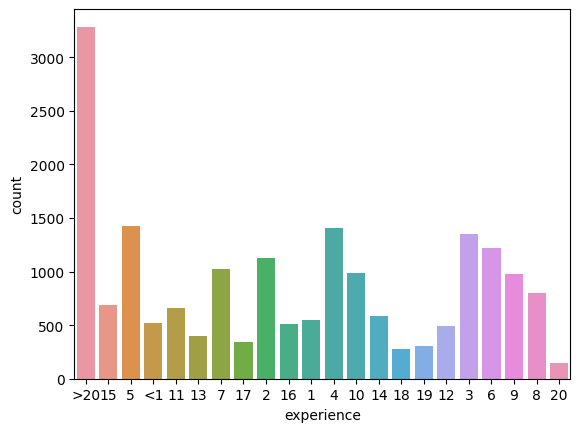

In [30]:
sns.countplot(x='experience', data=df)
plt.show()

* Max employees have experience of more than 20 years
* 65 employees have not specified experience

In [31]:
df['company_size'].value_counts(dropna=False)

company_size
NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

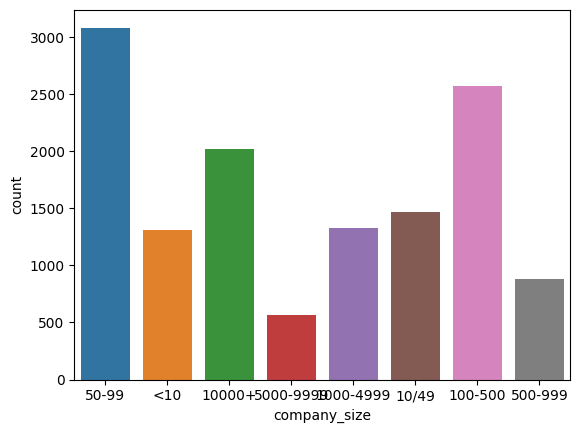

In [32]:
sns.countplot(x='company_size', data=df)
plt.show()

* Max employees have not specified their current company size 

In [33]:
df['company_type'].value_counts(dropna=False)

company_type
Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

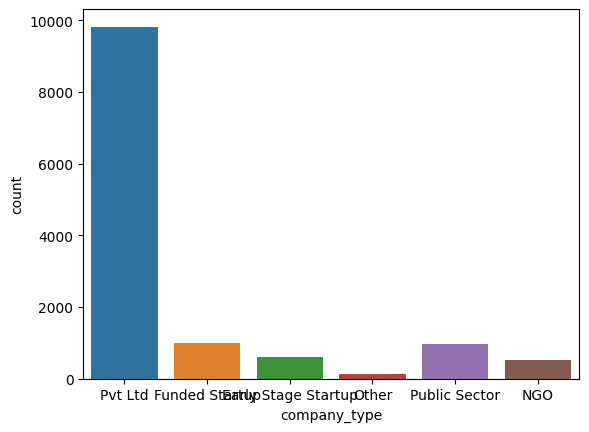

In [34]:
sns.countplot(x='company_type', data=df)
plt.show()

* Max employees have Private ltd company type
* 6140 have not specified their company type

In [35]:
df['last_new_job'].value_counts(dropna=False)

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: count, dtype: int64

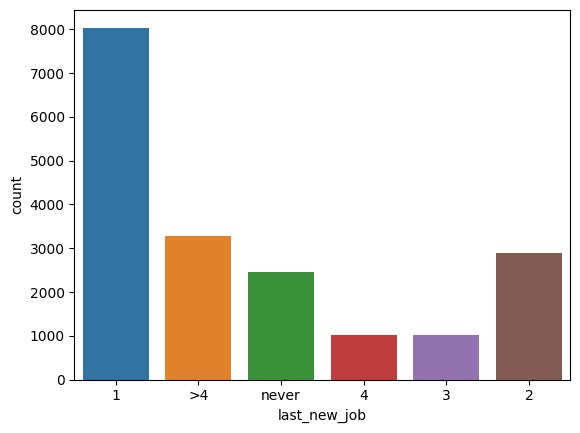

In [36]:
sns.countplot(x='last_new_job', data=df)
plt.show()

* Max employees have 1 year of gap between previous job and current job
* 423 have not specified this

**Number of employees want to change job**

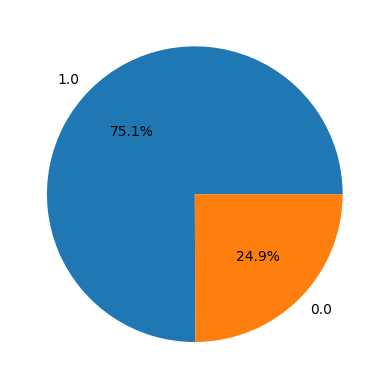

In [37]:
plt.pie(df['target'].value_counts(), labels=df['target'].unique(), autopct='%0.1f%%')
plt.show()

**75% of employees want to change job**

**On gender based how many want to change job**

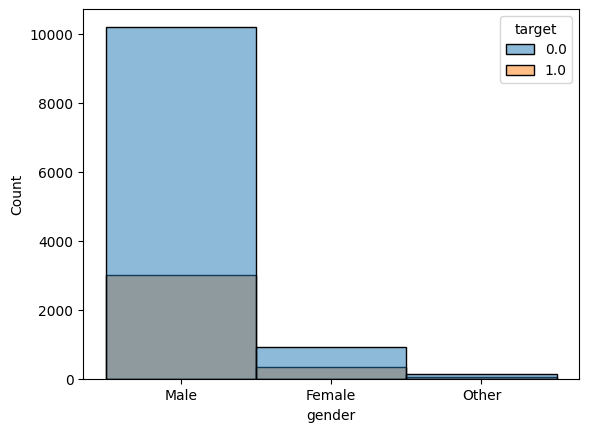

In [38]:
sns.histplot(x=df['gender'],hue=df['target'])
plt.show()

**As we can see more number of Males are there who want to change their job**